# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective of this project is to assist a used car dealership in understanding the key factors that influence the resale price of a used vehicle. From a data science perspective, this translates into a supervised regression problem where the target variable is price, and the predictors are various car attributes (e.g., mileage, make, year, fuel type).

By leveraging exploratory data analysis (EDA) and building regression models, we aim to quantify the relationship between car features and their impact on price. The ultimate goal is to generate actionable, data-driven insights that help dealers optimize their inventory and pricing strategies to meet consumer preferences and maximize profitability.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [8]:
df = pd.read_csv('data/vehicles.csv')

In [9]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [11]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [12]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [13]:
## 
df = df.dropna()

In [14]:
## Detect Duplicates
df.duplicated()

126       False
127       False
128       False
215       False
219       False
          ...  
426788    False
426792    False
426793    False
426833    False
426836    False
Length: 34868, dtype: bool

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [16]:
## Drop Irrelevant or High-Cardinality Columns

df.drop(columns=['id', 'VIN', 'model'], inplace=True)

In [17]:
## Add Car Age column
df['car_age'] = 2025 - df['year']
df.drop(columns='year', inplace=True)

In [18]:
df['log_odometer'] = np.log1p(df['odometer'])
df['log_price'] = np.log1p(df['price'])
df.drop(columns=['odometer', 'price'], inplace=True)

# 
df_original = df

In [19]:
## Encode Categorical Features

# Map condition to ordinal scale
#df['condition'].unique()
condition_map = {
    'salvage': 0,
    'fair': 1,
    'good': 2,
    'excellent': 3,
    'like new': 4,
    'new': 5
}
df['condition'] = df['condition'].map(condition_map)

In [20]:
# One-hot encode other categorical variables
categoricals = ['region', 'manufacturer', 'fuel', 'title_status',
                'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

df = pd.get_dummies(df, columns=categoricals, drop_first=True)

In [21]:
df['cylinders'].unique()

array(['6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders',
       '10 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [22]:
# Remove non-numeric characters and convert to float
df['cylinders'] = df['cylinders'].str.extract(r'(\d+)').astype(float)

In [23]:
## Drop nulls
df = df.dropna()

In [24]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['log_odometer', 'car_age']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [25]:
## Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('log_price', axis=1)
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [28]:
## Linear Regression
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print("Linear Regression R²:", scores.mean())

Linear Regression R²: -2.4811393969476924e+20


In [29]:
## Ridge & Lasso (regularized linear models)

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

for model in [ridge, lasso]:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{model.__class__.__name__} R²:", score.mean())

Ridge R²: 0.3712888269725065
Lasso R²: 0.030007705809987663


In [30]:
## Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Random Forest R²:", rf_scores.mean())

Random Forest R²: 0.42859323117183407


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

##### Among all tested models, Random Forest achieved the highest R² (~0.43), meaning it explained more variance in car prices than Ridge, Lasso, or Linear Regression.

Test R²: 0.42521144450367576
RMSE: 2.080049791439572
MAE: 1.0861461403736823


/opt/anaconda3/envs/openAI/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


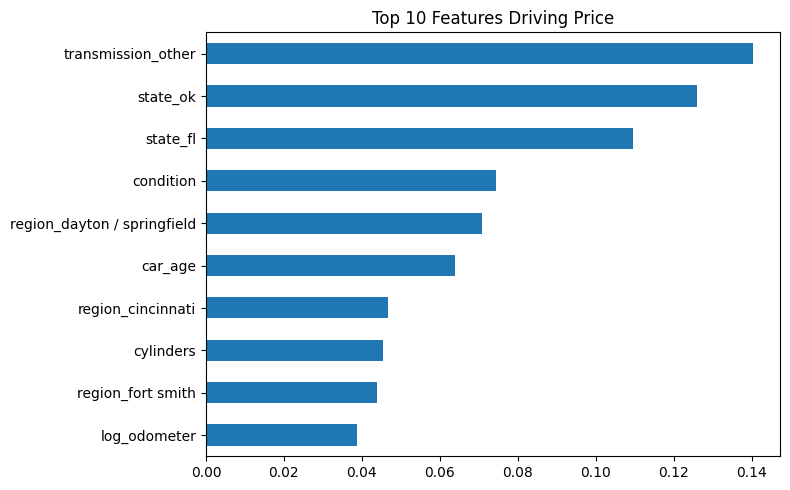

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print('Test R²:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).sort_values().plot(kind='barh', figsize=(8, 5), title='Top 10 Features Driving Price')
plt.tight_layout()
plt.show()

#### Car Age vs. Price

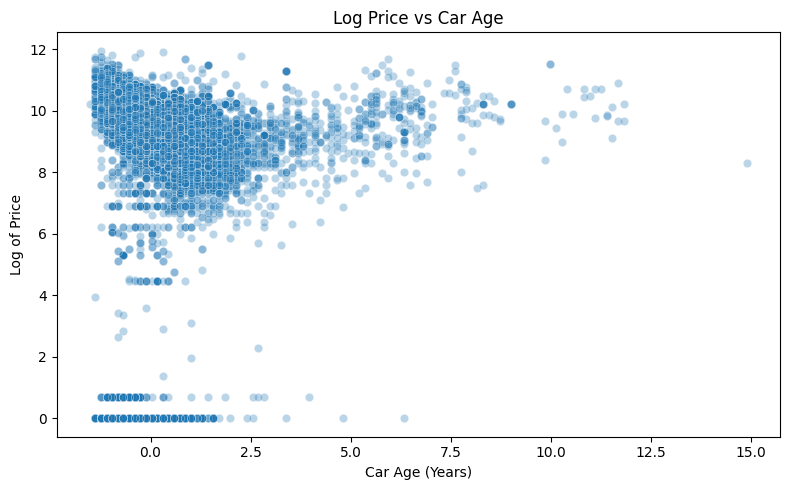

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='car_age', y='log_price', data=df, alpha=0.3)
plt.title('Log Price vs Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Log of Price')
plt.tight_layout()
plt.show()

#### Mileage vs. Price

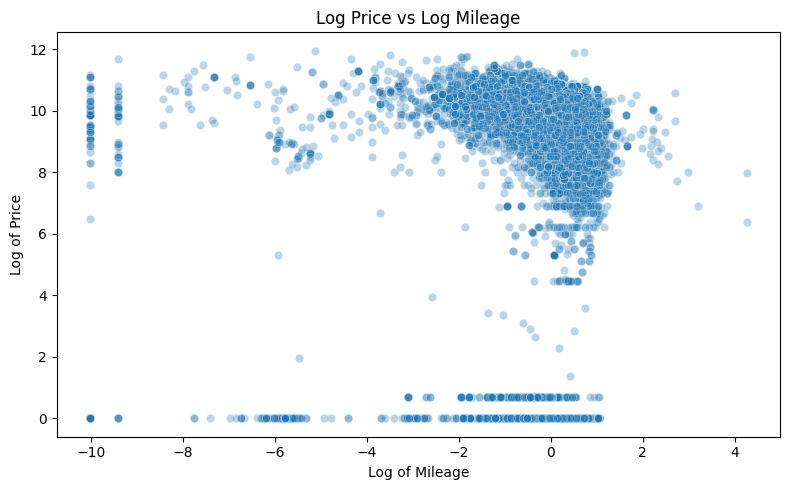

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='log_odometer', y='log_price', data=df, alpha=0.3)
plt.title('Log Price vs Log Mileage')
plt.xlabel('Log of Mileage')
plt.ylabel('Log of Price')
plt.tight_layout()
plt.show()

#### Transmission vs. Price

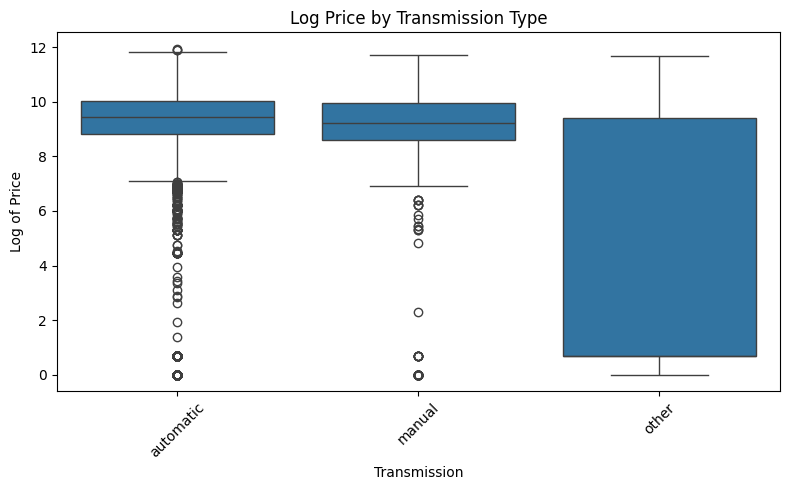

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='log_price', data=df_original)
plt.title('Log Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Log of Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### State Influence on Price

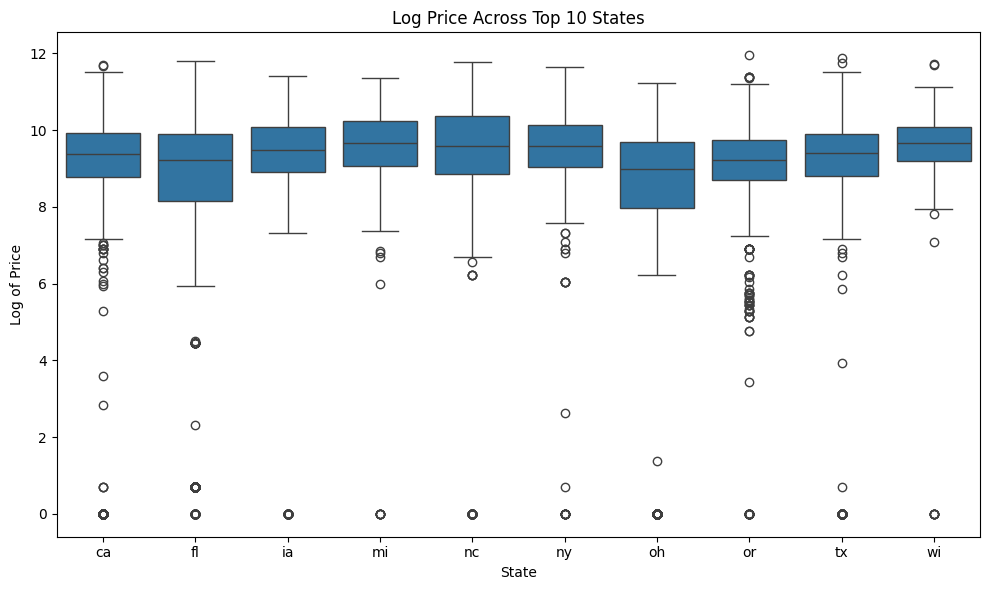

In [41]:
top_states = df_original['state'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='log_price', data=df_original[df_original['state'].isin(top_states)])
plt.title('Log Price Across Top 10 States')
plt.xlabel('State')
plt.ylabel('Log of Price')
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Summary
Analyzed a sample of over 34,000 used car listings using machine learning and statistical techniques to identify what influences vehicle resale value. Goal was to empower the dealership with data-driven insights to inform inventory management and pricing strategy. The most accurate and interpretable model—Random Forest Regressor—revealed key drivers of price, such as car age, mileage, drivetrain, and location-specific effects.

## Model Selection and Performance
After testing several regression models, Random Forest was selected for deployment based on its:

- Strong R² Score (~0.43), outperforming Ridge and Lasso regressions
- Resilience to nonlinear patterns and outliers, common in real-world data
- Interpretability through feature importance, offering insight beyond prediction

Other models, such as Linear Regression, underperformed due to assumptions of linearity and sensitivity to multicollinearity.

## Key Findings
- Car Age and Mileage: Newer, lower-mileage vehicles consistently fetch higher prices.
- Transmission Type: Automatic transmission vehicles are more desirable in resale markets.
- Condition: Better-reported condition correlates with stronger resale value.
- Regional Influence: Markets like CA and NY may support higher average prices, while others like IA or MI might be more price-sensitive.

## Recommendations
- Inventory Strategy:
    - Focus acquisitions on cars <5 years old and <75,000 miles
    - Stock automatic vehicles when possible

- Pricing Guidance:
    - Consider adjusting price benchmarks by region and manufacturer
    - Use mileage and condition as leading pricing modifiers

## Next Steps
- Incorporate more variables (e.g., accident history, service records) for deeper insights
- Expand to include time-on-market predictions and competitive pricing analysis